Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Max Values of the circle: circ_1- 7.648906741582038 7.112897557574929
Max Values of the circle: circ_2- 7.112897557574929 7.648906741582038


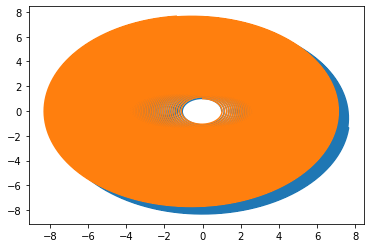

In [14]:
# Homework:
# Write your own Euler or any scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.0. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. 
"""
Write your own Euler to calculate the orbit of two equal mass binary
"""
import numpy as np
import matplotlib.pyplot as plt
"""
The mass of each binary makes GM_{i}=1, (i is 1 or 2). 
The two binary stars are seperated by a distance of 1 initially.
"""
GM = [1,1]
tend=(2.*np.pi)*100#100 Binary orbits
h=0.001

"""
If we want to initialize the binary velocity 
so that each star has an eccentricity of zero,
then 

\sqrt(x_i**2 + y_i**2) = 1

must be satisfied at the initial point, as we are looking for the
orbit of a circle. More generally, to have an initial distance of r=1,

sqrt((x_1-x_2)**2 + (y_1-y_2)**2)=1

must be satisfied, where
y_i[0] = x, y_i[1] = v_x, y_i[2] = y, y_i[3] = v_y
"""
y_1=[1,0,0,1]
y_2=[0,1,1,0]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-GM[0]*y[0]/(r**3)
    f[2]=y[3]
    f[3]=-GM[1]*y[2]/(r**3)
    return f
    
def eu(t, h, y,n): #push the solution to advance one h, n is the number of variables
    fv=f(t, y)
    for i in range(n):
        y[i]+=fv[i]*h
    return y

xp_1=[]
xp_2=[]
yp_1=[]
yp_2=[]

n = 0
while(t<tend):
    n+=1
    if((t+h)>tend):
        h=tend-t
    y_1 = eu(t,h+.01,y_1,4)
    y_2 = eu(t,h+.01,y_2,4)
    #Replace np.append with list.append; it's faster
    xp_1.append(y_1[0])
    yp_1.append(y_1[2])
    xp_2.append(y_2[0])
    yp_2.append(y_2[2])
    t = t+h
    if(n%100000==0):
        print("Iteration",n)
print("Max Values of the circle: circ_1-",max(xp_1),max(yp_1))
print("Max Values of the circle: circ_2-", max(xp_2),max(yp_2))

plt.plot(xp_1,yp_1)
plt.plot(xp_2,yp_2)
plt.show()